## Loading the dataset

In [1]:
from keras.datasets import mnist

In [2]:
(train_image, train_label), (test_image, test_label) = mnist.load_data()

In [3]:
print(f"The size of train_data - {train_image.shape}")
print(f"The size of train_label - {train_label.shape}")
print(f"The size of test_data - {test_image.shape}")
print(f"The size of test_label - {test_label.shape}")

The size of train_data - (60000, 28, 28)
The size of train_label - (60000,)
The size of test_data - (10000, 28, 28)
The size of test_label - (10000,)


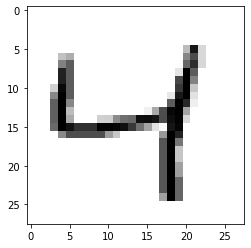

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_image[2], cmap = plt.cm.binary)
plt.show()

## Preparing the image data

In [5]:
train_image = train_image.reshape(60000, 28 * 28)
train_image = train_image.astype('float32') / 255

test_image = test_image.reshape(10000, 28 * 28)
test_image = test_image.astype('float32') / 255

## Preparing the Labels

In [8]:
from keras.utils import to_categorical
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

## Network Architecture

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(train_image, train_label, epochs = 5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 12ms/step - loss: 0.4249 - accuracy: 0.8773
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1071 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0662 - accuracy: 0.9802
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0484 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0367 - accuracy: 0.9890


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Evaluating the Model

In [12]:
test_loss, test_acc = model.evaluate(test_image, test_label)
print(f"Test loss - {test_loss}")
print(f"Test acc - {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9796
Test loss - 0.06754136085510254
Test acc - 0.9796000123023987
